# COMPLEX NETWORKS - PART 1

### Objectiu

En aquest projecte analitzarem dues de les xarxes que podem trobar a "The Koblenz Network
Collection" (http://konect.uni-koblenz.de/). Hem escollit estudiar la wikipedia espanyola i alemanya. 
L'estructura del projecte és el següent:
- Estudi prel.liminar de les dades
- Neteja de les dades.  
- Estudi de l'estructura temporal
- Perfil per articles més editats i per autors que més editen
- Clustering
- Bootstrapping i inferència
- Bipartite graphs i mètriques
- Grafs





A la descripció podem observar que les dues wikipèdies tenen dimensions equiparables:

- Wikipedia alemany: 4,046,832 = 3,620,990 usuaris + 425,842 articles

- Wikipedia espanyol: 3,623,742 = 3,288,398 usuaris + 335,344 articles 

## 1. Estructura temporal de les WIKIPÈDIES

In [96]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(12.0,6.0)


matplotlib.rcParams.update({'font.size': 15})


Populating the interactive namespace from numpy and matplotlib


In [106]:
#Importem les dades al dataframe Wikipedia espanyol Complet i dataframe Wikipedia alemany Complet

WesC=pd.read_csv('dfR.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=1000000)
WdeC=pd.read_csv('dfR_de.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=1000000)

In [107]:
#importar una mostra aleatòria de tota la base
Wes=WesC.sample(100000)
Wde=WdeC.sample(100000)

### AQUEST PAS ÉS CRÍTIC PER TOTA LA RESTA DEL NOTEBOOK. TREBALLEM SEMPRE AMB LA MOSTRA ORDENADA.
### NO ÉS COHERENT PERQUÈ LA DATA PODRIA NO SER UN VALOR ÚNIC.

Wes=Wes.sort_values(by='Data')
Wde=Wde.sort_values(by='Data')

In [108]:
#Convertim les dades de UNIXEPOCH a llegibles

Wes['DataN'] = pd.to_datetime(Wes['Data'],unit='s')
Wde['DataN']= pd.to_datetime(Wde['Data'], unit = 's')

In [109]:
Wes.sort_values(by='DataN')
Wde.sort_values(by='DataN')

,Autor,Article,Data,DataN
254759,1682,888,1030555138.000,2002-08-28 17:18:58
168676,1682,564,1030569822.000,2002-08-28 21:23:42
711261,1,2543,1030572605.000,2002-08-28 22:10:05
279513,1,946,1030573386.000,2002-08-28 22:23:06
425518,1,1493,1030573984.000,2002-08-28 22:33:04
805865,1,2877,1030574519.000,2002-08-28 22:41:59
713012,281,2552,1030603147.000,2002-08-29 06:39:07
70151,281,222,1030607234.000,2002-08-29 07:47:14
418064,281,1468,1030611475.000,2002-08-29 08:57:55
230976,1,793,1030612160.000,2002-08-29 09:09:20


In [110]:
# Modifiquem la columna Article afegint-hi Art_
Wes['Article']= 'Art_es_' + Wes['Article'].astype(str)
Wde['Article']= 'Art_de_' + Wde['Article'].astype(str)

In [111]:
# Eliminem la columna Data si ja tenim la columna DataN
del Wes['Data']

In [112]:
# Creem comptador per la wikipedia espanyol
Comptador_Wes = pd.Series(range (len(Wes)))
Comptador_Wes.max()
#concorda amb el mostreig de la població


99999

In [113]:
# Creem comptador per la wikipedia alemany
Comptador_Wde = pd.Series(range (len(Wde)))
Comptador_Wde.max()
#concorda amb el mostreig de la població


99999

In [114]:
Wes['Comptador_Wes'] = Comptador_Wes.values

In [115]:
Wde['Comptador_Wde'] = Comptador_Wde.values

In [116]:
# Canviem del dataframe Wes al time series tsWes per poder agrupar distribució dels events per mes, dia, etc..
Wes['Comptador_Wes']=Wes['Comptador_Wes']/Wes['Comptador_Wes'].max()
tsWes = pd.Series(Wes['Comptador_Wes'].values, index = Wes['DataN'])
tsWes.head();

In [117]:
# Canviem del dataframe Wde al time series tsWde per poder agrupar distribució dels events per mes, dia, etc..
Wde['Comptador_Wde']=Wde['Comptador_Wde']/Wde['Comptador_Wde'].max()
tsWde = pd.Series(Wde['Comptador_Wde'].values, index = Wde['DataN'])
tsWde.head();

## Resultats

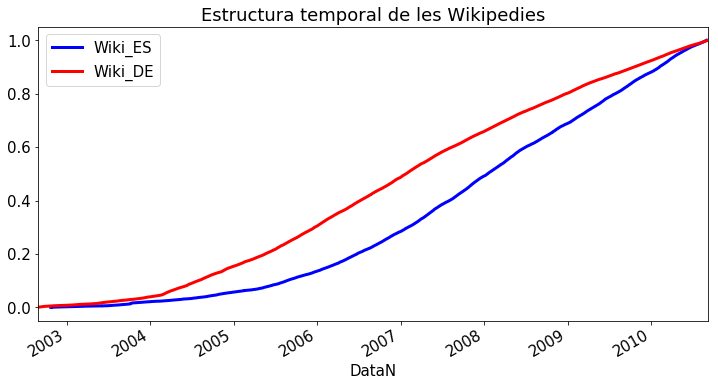

In [118]:

tsWes.plot (x='DataN', y='Comptador_Wes', label='Wiki_ES', legend='a', color='b', linewidth=3 ,title="Estructura temporal de les Wikipedies")
tsWde.plot (x='DataN', y='Comptador_Wde',label='Wiki_DE', legend='a', color='r', linewidth=3)
plt.title
plt.show()


### Conclusions

Es pot observar que la Wikipèdia alemanya s'anticipa a la Wikipèdia espanyola tot i que semblen convergir a partir del 2010. 

# 2. Data cleaning

En aquesta secció procedirem a la neteja de dades. Després d'una inspecció en detall hem vist que hi ha moltes edicions que en realitat es tracten de còpies de seguretat fetes pel mateix autor amb poc temps de diferència. Per a poder realment extraure conclusions i informació real de les dades de la wikipedia, esborrarem aquelles edicions que no siguin edicions **reals**. 

Per a que les gràfiques siguin il.lustratives del procés no ho fem per tota la mostra, si no per una fracció petita. Les figures de la presentació si han tingut en compte tota la mostra.

In [120]:
#Llegim les dades. 
WesC=pd.read_csv('dfR.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=20000)
#Wes=WesC.sample(5000)
Wes=WesC
print len(Wes)
Wes=Wes.sort_values(by='Data')
Wes.head()
Wes['DataN'] = pd.to_datetime(Wes['Data'],unit='s')
Wes.head()
Wes['Article']= 'Art_' + Wes['Article'].astype(str)

#Busquem els articles unics i els autors unics

uniq_arts = Wes['Article'].unique()
print len(uniq_arts)
uniq_auts = Wes['Autor'].unique()
print len(uniq_auts)
Wes.head()

20000
24
2403


,Autor,Article,Data,DataN
19160,1398,Art_23,1035375099,2002-10-23 12:11:39
19763,1378,Art_24,1035409846,2002-10-23 21:50:46
19764,1378,Art_24,1035409916,2002-10-23 21:51:56
14670,1378,Art_16,1035410464,2002-10-23 22:01:04
14671,1378,Art_16,1035410515,2002-10-23 22:01:55


### Neteja de dades: Opció 1

Procedirem a netejar les dades de dues maneres diferents. Tenint en compte la gran quantitat de dades (27 milions de línies de la wikipedia espanyola), ens interessa trobar una manera ràpida i eficaç per el.liminar edicions que no són reals (còpies de seguretat). Utilitzarem **datetime** per a transformar la data en any, mes, dia i hora i **drop_duplicates** per a només deixar la primera edició per article, autor i hora.  

In [121]:
import datetime

pd.set_option('display.float_format', lambda x: '%.3f' % x)

sc = Wes.copy()
sc.index = sc['DataN']

sc['DataNyear'] = sc['DataN'].dt.year
sc['DataNmonth'] = sc['DataN'].dt.month
sc['DataNday'] = sc['DataN'].dt.day
sc['DataNhour'] = sc['DataN'].dt.hour
              
#print sc

scc = sc.filter(['Article','Autor','DataNyear','DataNmonth','DataNday','DataNhour'], axis=1)
sc2=sc.drop_duplicates(subset=scc, keep='first', inplace=False)

sc_clean=sc2.drop(['DataNyear','DataNmonth','DataNday','DataNhour'], axis=1)

#sc_clean.to_csv('WesC_clean.csv')

print len(sc_clean)
sc_clean.head()

14745


,Autor,Article,Data,DataN
DataN,,,,
2002-10-23 12:11:39,1398,Art_23,1035375099,2002-10-23 12:11:39
2002-10-23 21:50:46,1378,Art_24,1035409846,2002-10-23 21:50:46
2002-10-23 22:01:04,1378,Art_16,1035410464,2002-10-23 22:01:04
2002-10-23 22:09:53,1493,Art_19,1035410993,2002-10-23 22:09:53
2002-10-23 23:14:43,1378,Art_12,1035414883,2002-10-23 23:14:43


### Neteja de dades: Opció 2

Una altre possibilitat es fer-ho amb un for loop. Calculem la diferència en temps entre les edicions dels articles
i després marquem amb Index=1 aquells articles que tinguin una diferència menys de 5000s per a el.liminar després 
aquelles edicions que siguin actualitzacions pel mateix autor. 
Aquesta opció triga moltíssim més i tot i que el resultat hauria de ser el mateix que el de la opció 1 (i així ho hem comprovat amb mostres petites) triga molt més temps. Per exemple, 7200 hores per a 1 milió de línies.


In [ ]:
#No recomanem executar aquest tros perque triga molt, però ho deixem com a mostra del que hauria de 
#ser si es volgués fer amb aquest mètode.

for art in uniq_arts:
    #print 'Article', art
    for aut in uniq_auts:
        #print 'Author', aut
        sc1 = sc.where((sc['Article'] == art) & (sc['Autor'] == aut))
        sc1['Data_shift'] = sc1['Data'].shift(1)
        sc1['Delta'] = sc1['Data'] - sc1['Data_shift']
        sc.loc[sc1['Delta'] < 5000, 'Index'] = 1

#Netejem la mostra eliminant aquells articles que estiguin marcats amb Index?1
sc_clean=sc[sc.Index != 1]
sc_final=sc_clean.drop('Index', axis=1)
#sc_final.to_csv('WesC_clean_opcio2.csv')
#sc_final.head()

### Comparació abans i després de la neteja

A continuació farem unes gràfiques per a comparar com les mostres de dades han canviat abans i després de la neteja de dades.


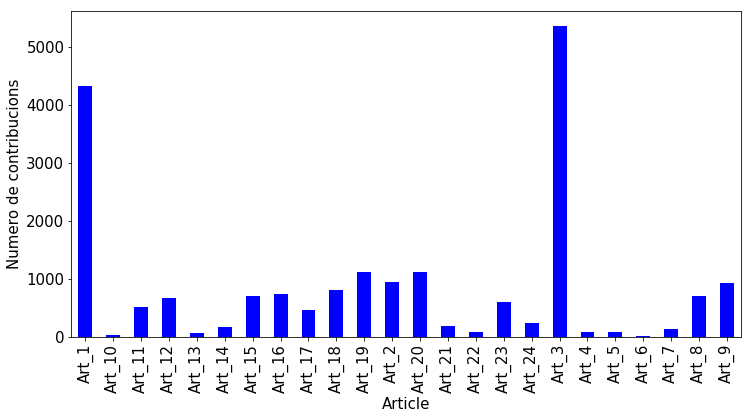

In [122]:
#Fem un plot del numero de contribucions per article
article_autor = Wes[['Article','Autor']].groupby('Article').count()
article_autor.sort_values(by='Autor', ascending = False)
#plotegem en barres
ax = article_autor['Autor'].plot(kind='bar', color='b')
ax.set_ylabel("Numero de contribucions") #no admet Número amb accent
plt.show()
#plt.savefig('Wes_pre.png')

14745
20000


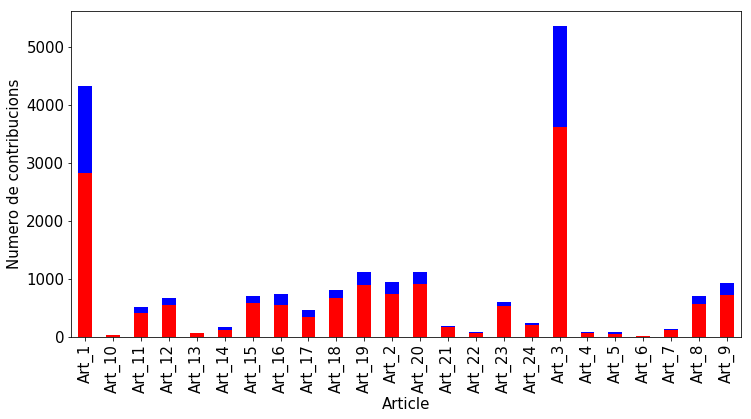

In [123]:
#Comparem mostra completa amb la neta
print len(sc_clean)
print len(Wes)

a_aWes = Wes[['Article','Autor']].groupby('Article').count()
a_aWes.sort_values(by='Autor', ascending = False)
a_a = sc_clean[['Article','Autor']].groupby('Article').count()
a_a.sort_values(by='Autor', ascending = False)
#plotegem en barres
ax = a_aWes['Autor'].plot(kind='bar', color='b')
ax = a_a['Autor'].plot(kind='bar', color='r')
ax.set_ylabel("Numero de contribucions") #no admet Número amb accent
plt.show()
#plt.savefig('Wes_post.png')


Veiem com despres de la neteja la mostra original s'ha reduit en un 25%. A partir d'ara aquestes són les dades que farem servir per la resta de l'estudi.

## 3. Perfil temporal articles més editats

Un cop netejades les Wikipedies, volem veure com han evolucionat les dues wikipèdies en el temps. En aquest apartat en particular, estudiarem quin perfil temporal tenen els articles més editats

In [125]:
#Importem les dades al dataframe Wikipedia espanyol Complet i dataframe Wikipedia alemany Complet ja netejats.

WesC=pd.read_csv('WesC_clean.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=1000000)
WdeC=pd.read_csv('WesC_clean_de.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=1000000)
#importar una mostra aleatòria de tota la base
Wes=WesC.sample(100000)
Wde=WdeC.sample(100000)

### AQUEST PAS ÉS CRÍTIC PER TOTA LA RESTA DEL NOTEBOOK. TREBALLEM SEMPRE AMB LA MOSTRA ORDENADA.
### NO ÉS COHERENT PERQUÈ LA DATA PODRIA NO SER UN VALOR ÚNIC.


Wes=Wes.sort_values(by='Data')
Wde=Wde.sort_values(by='Data')

#Convertim les dades de UNIXEPOCH a llegibles


Wes['DataN'] = pd.to_datetime(Wes['Data'],unit='s')
Wde['DataN']= pd.to_datetime(Wde['Data'], unit = 's')
Wes.sort_values(by='DataN');
Wde.sort_values(by='DataN');

In [126]:
# Modifiquem la columna Article afegint-hi Art_
Wes['Article']= 'Art_es_' + Wes['Article'].astype(str)
Wes.head();
Wde['Article']= 'Art_de_' + Wde['Article'].astype(str)
Wde.head();
# problema pq després ordena malament.
# Si volem incorporar Aut_ davant de l'Autor:
# Wes['Autor']='Au_' + Wes['Autor'].astype(str)
# Eliminem la columna Data si ja tenim la columna DataN
del Wes['Data']
Wes.head();

In [127]:
article_autor_es = Wes[['Article','Autor']].groupby('Article').count().sort_values(by='Autor', ascending = False)
article_autor_de = Wde[['Article','Autor']].groupby('Article').count().sort_values(by='Autor', ascending = False)
article_autor_es = article_autor_es.head(3)
article_autor_de = article_autor_de.head(3)
# Per cada article, vull plotejar les dates en què s'han anat escrivint.

llistat_articles_es= article_autor_es.index.tolist()
llistat_articles_de= article_autor_de.index.tolist()
print llistat_articles_es, llistat_articles_de


['Art_es_Art_5064.0', 'Art_es_Art_79979.0', 'Art_es_Art_27415.0'] ['Art_de_Art_6452.0', 'Art_de_Art_23277.0', 'Art_de_Art_5914.0']


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


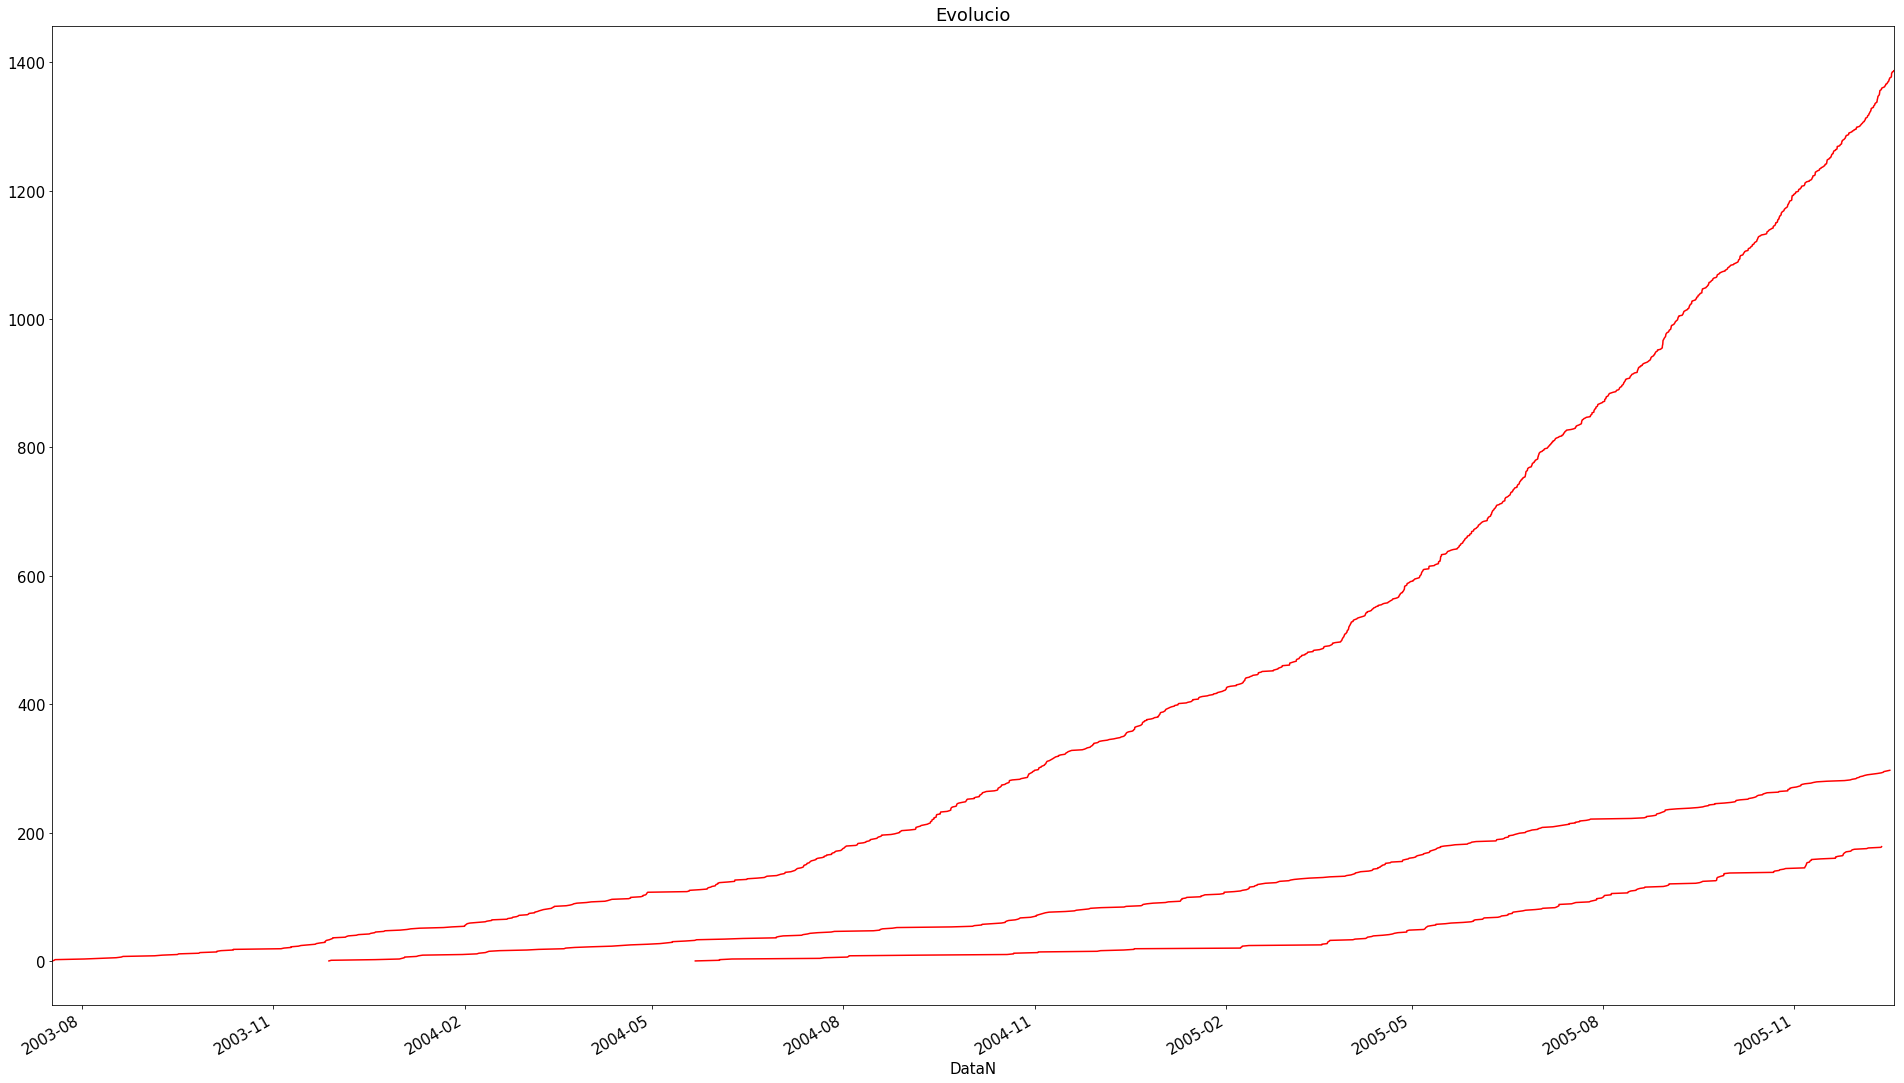

In [128]:
for a in llistat_articles_es:
#a = 'Art_2'

    nom_df =('Wes' + a) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + a) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + a)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ a) #nom de la timeserie que creem per cada article
    
    nom_df = Wes.loc[Wes['Article'] == (a)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color = 'r') #plotegem (pendent de refinar)
    #plt.show();



/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


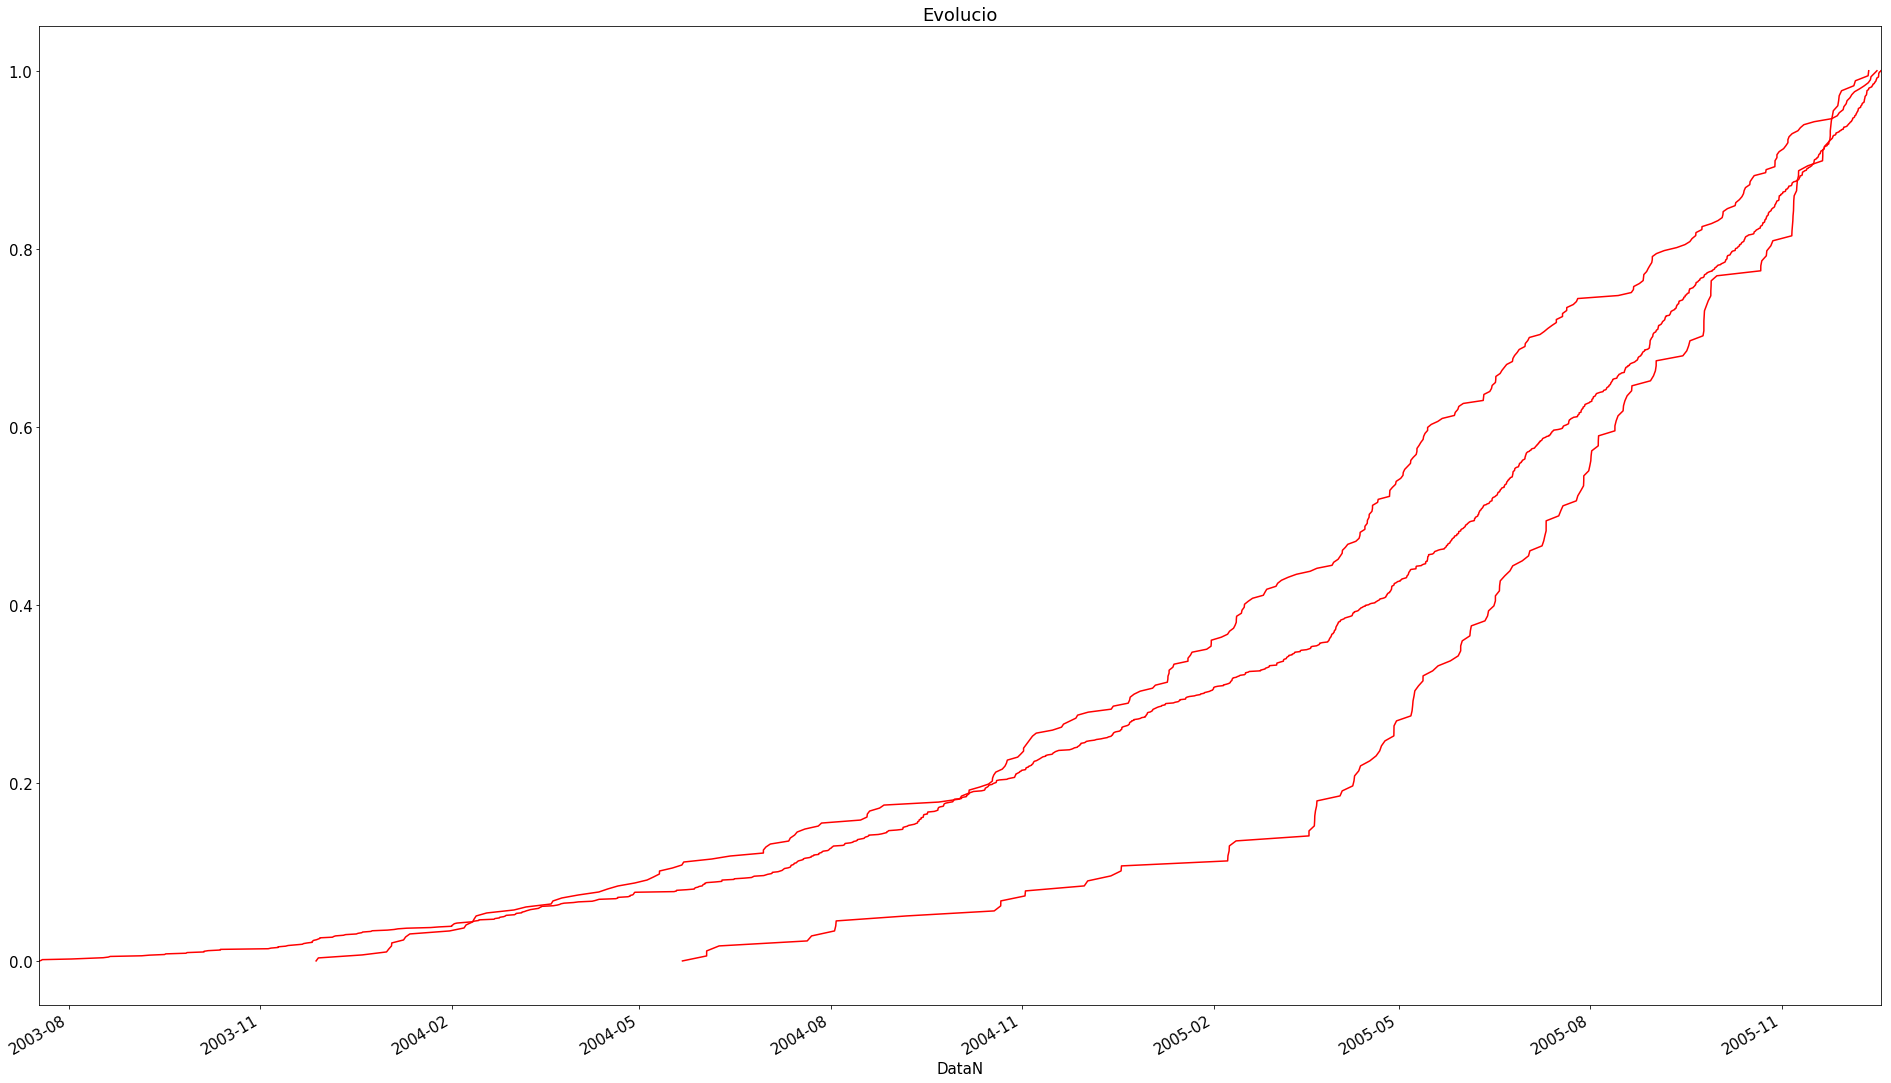

In [129]:
for a in llistat_articles_es:
#a = 'Art_2'

    nom_df =('Wes' + a) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + a) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + a)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ a) #nom de la timeserie que creem per cada article
    
    nom_df = Wes.loc[Wes['Article'] == (a)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df[Comptador] = nom_df[Comptador]/nom_df[Comptador].max() #normalitzem
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color ='r') #plotegem (pendent de refinar)
    #plt.show();


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


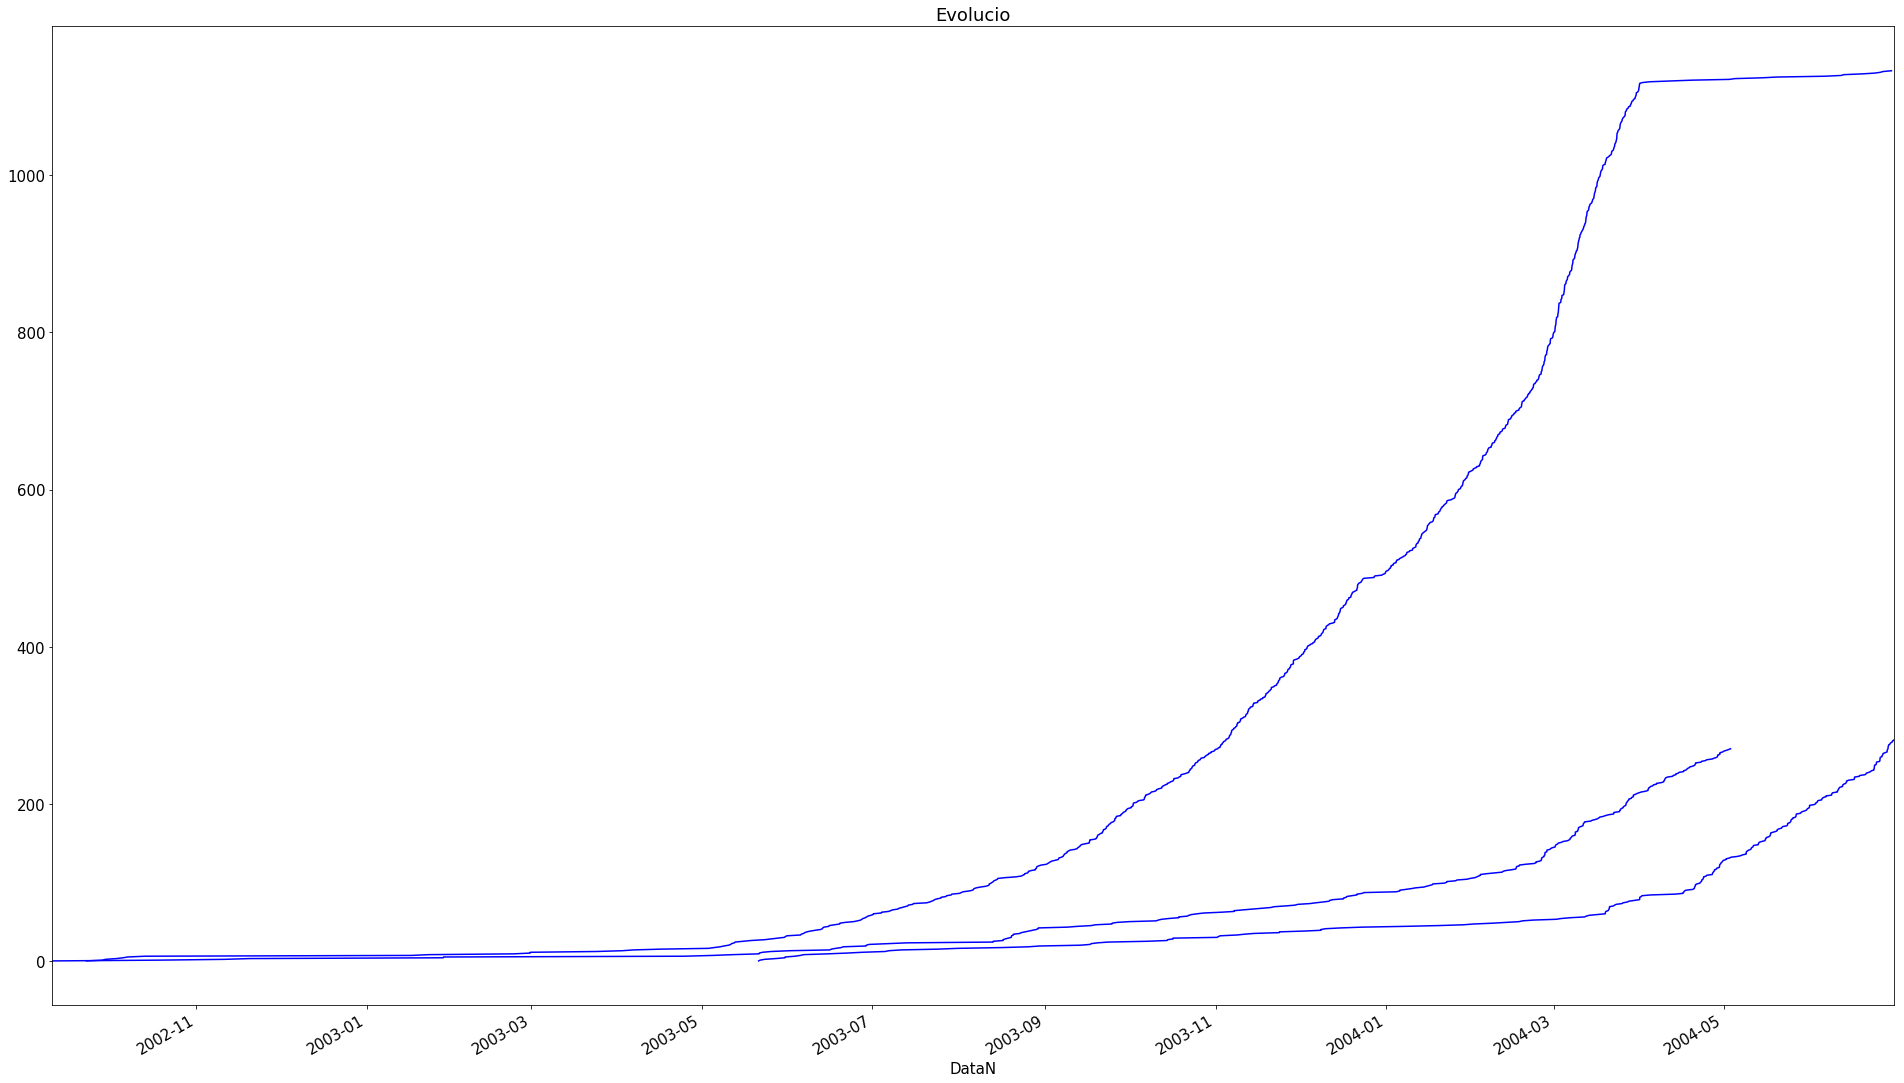

In [130]:
for b in llistat_articles_de:
#a = 'Art_2'

    nom_df =('Wde' + a) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + b) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + b)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ b) #nom de la timeserie que creem per cada article
    
    nom_df = Wde.loc[Wde['Article'] == (b)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color = 'b') #plotegem (pendent de refinar)
    #plt.show();


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


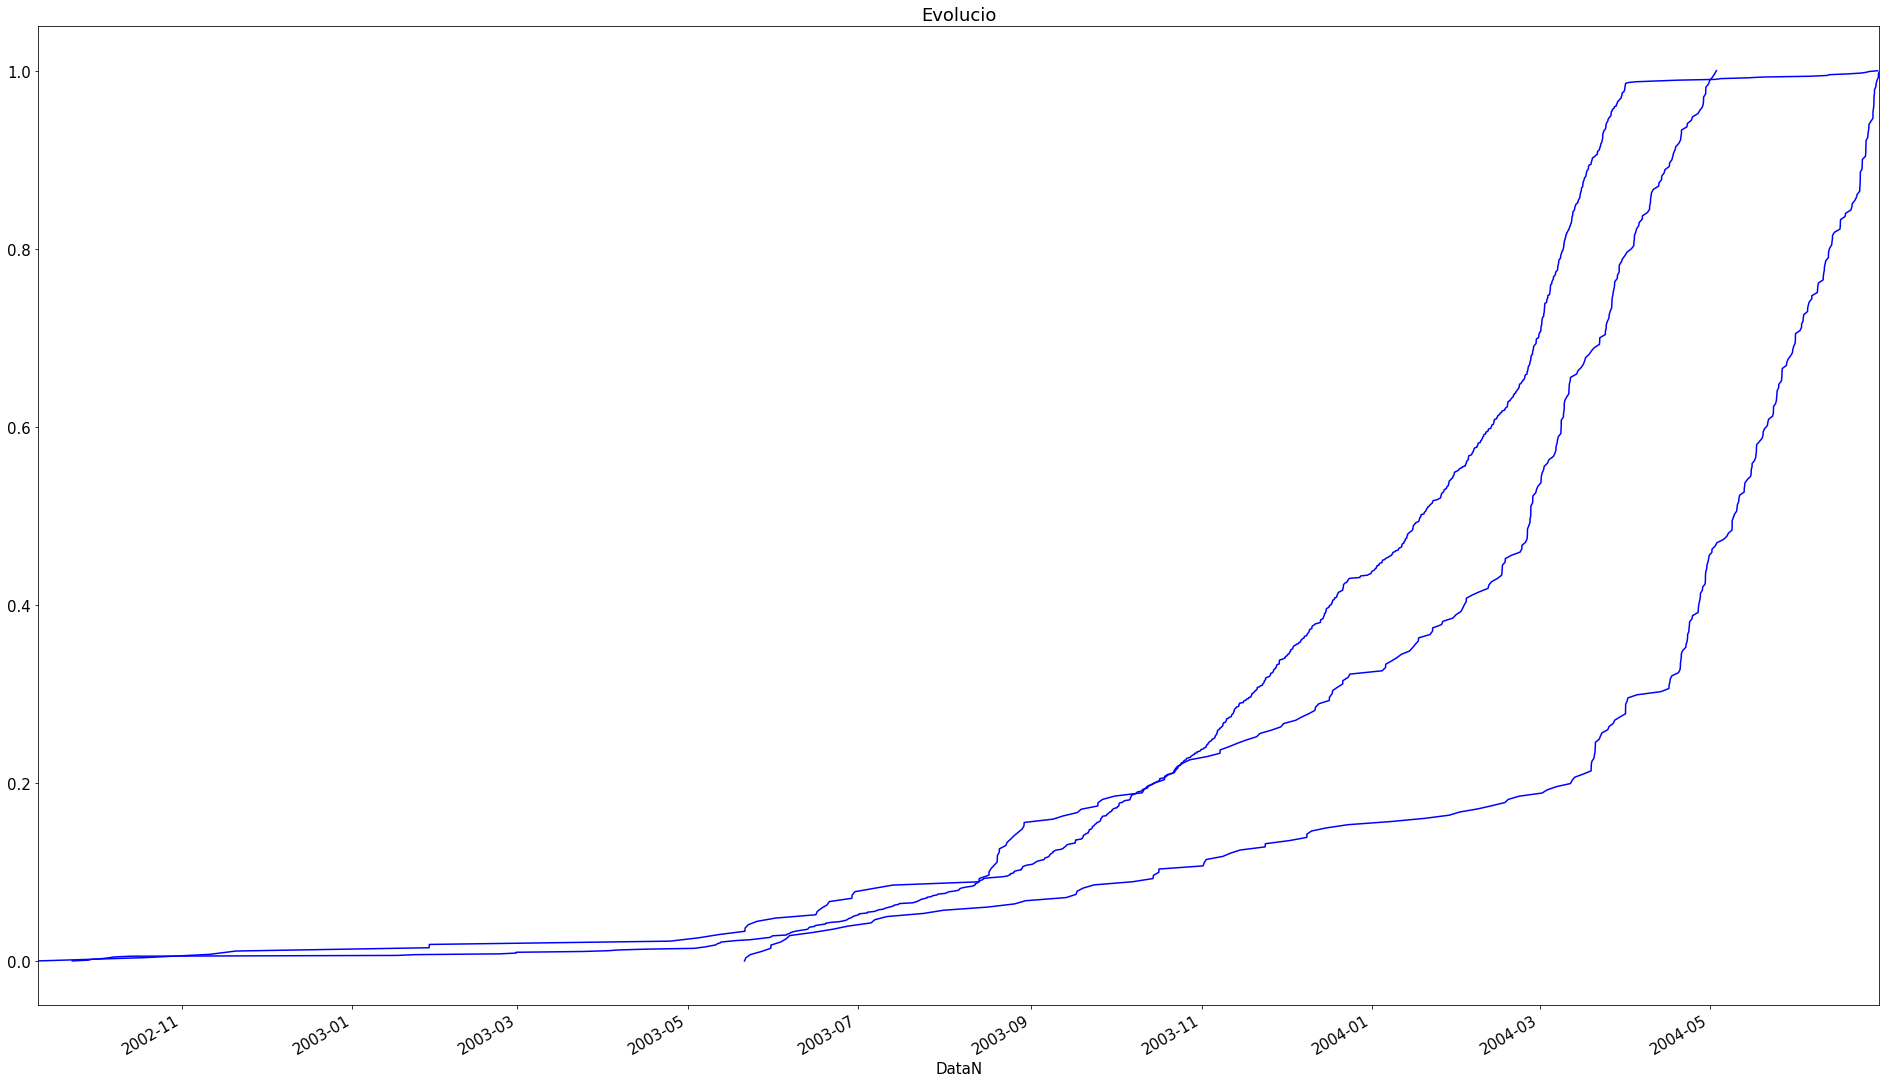

In [131]:
for b in llistat_articles_de:
#a = 'Art_2'

    nom_df =('Wde' + a) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + b) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + b)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ b) #nom de la timeserie que creem per cada article
    
    nom_df = Wde.loc[Wde['Article'] == (b)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df[Comptador] = nom_df[Comptador]/nom_df[Comptador].max() #normalitzem
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color = 'b') #plotegem (pendent de refinar)
    #plt.show();

## 5. Perfil temporal dels autors que més editen

En aquest apartat estudiem el perfil temporal dels autors que mes editen

In [132]:
autor_article_es = Wes[['Article','Autor']].groupby('Autor').count().sort_values(by='Article', ascending = False)
autor_article_de = Wde[['Article','Autor']].groupby('Autor').count().sort_values(by='Article', ascending = False)
autor_article_es=autor_article_es.head(6)
autor_article_de=autor_article_de.head(6)

In [133]:
# Per cada article, vull plotejar les dates en què s'han anat escrivint.

llistat_articles_es= article_autor_es.index.tolist()
llistat_articles_de= article_autor_de.index.tolist()
print llistat_articles_es, llistat_articles_de
llistat_autors_es=autor_article_es.index.tolist()
llistat_autors_de=autor_article_de.index.tolist()
print llistat_autors_es, llistat_autors_de

['Art_es_Art_5064.0', 'Art_es_Art_79979.0', 'Art_es_Art_27415.0'] ['Art_de_Art_6452.0', 'Art_de_Art_23277.0', 'Art_de_Art_5914.0']
[568.0, 573.0, 95.0, 577.0, 570.0, 15.0] [6.0, 8.0, 2.0, 386.0, 461.0, 191.0]


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


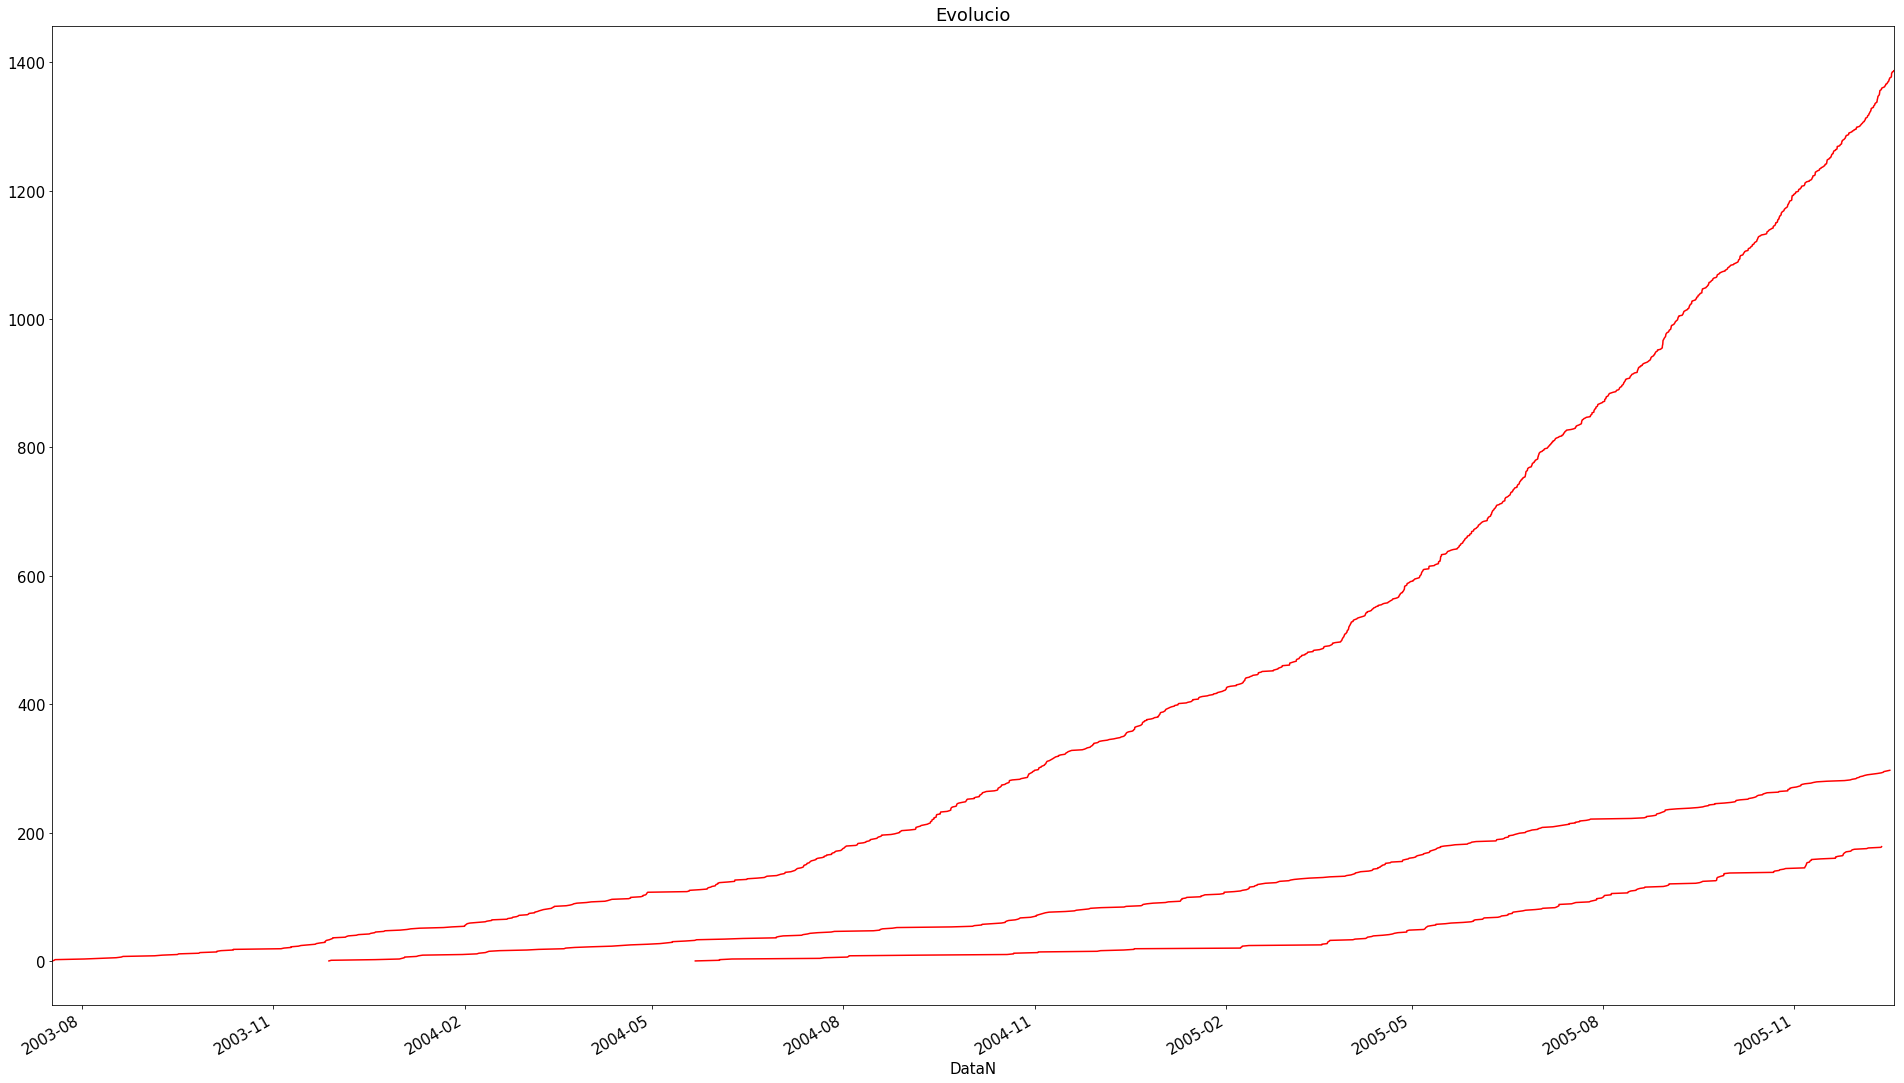

In [134]:
for a in llistat_articles_es:
#a = 'Art_2'

    nom_df =('Wes' + a) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + a) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + a)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ a) #nom de la timeserie que creem per cada article
    
    nom_df = Wes.loc[Wes['Article'] == (a)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color = 'r') #plotegem (pendent de refinar)
    #plt.show();


In [135]:
for c in llistat_autors_es:
#a = 'Art_2'

    nom_df =('Wes' + c) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + c) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + c)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ c) #nom de la timeserie que creem per cada article
    
    nom_df = Wes.loc[Wes['Autor'] == (c)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color = 'r') #plotegem (pendent de refinar)
    #plt.show();

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


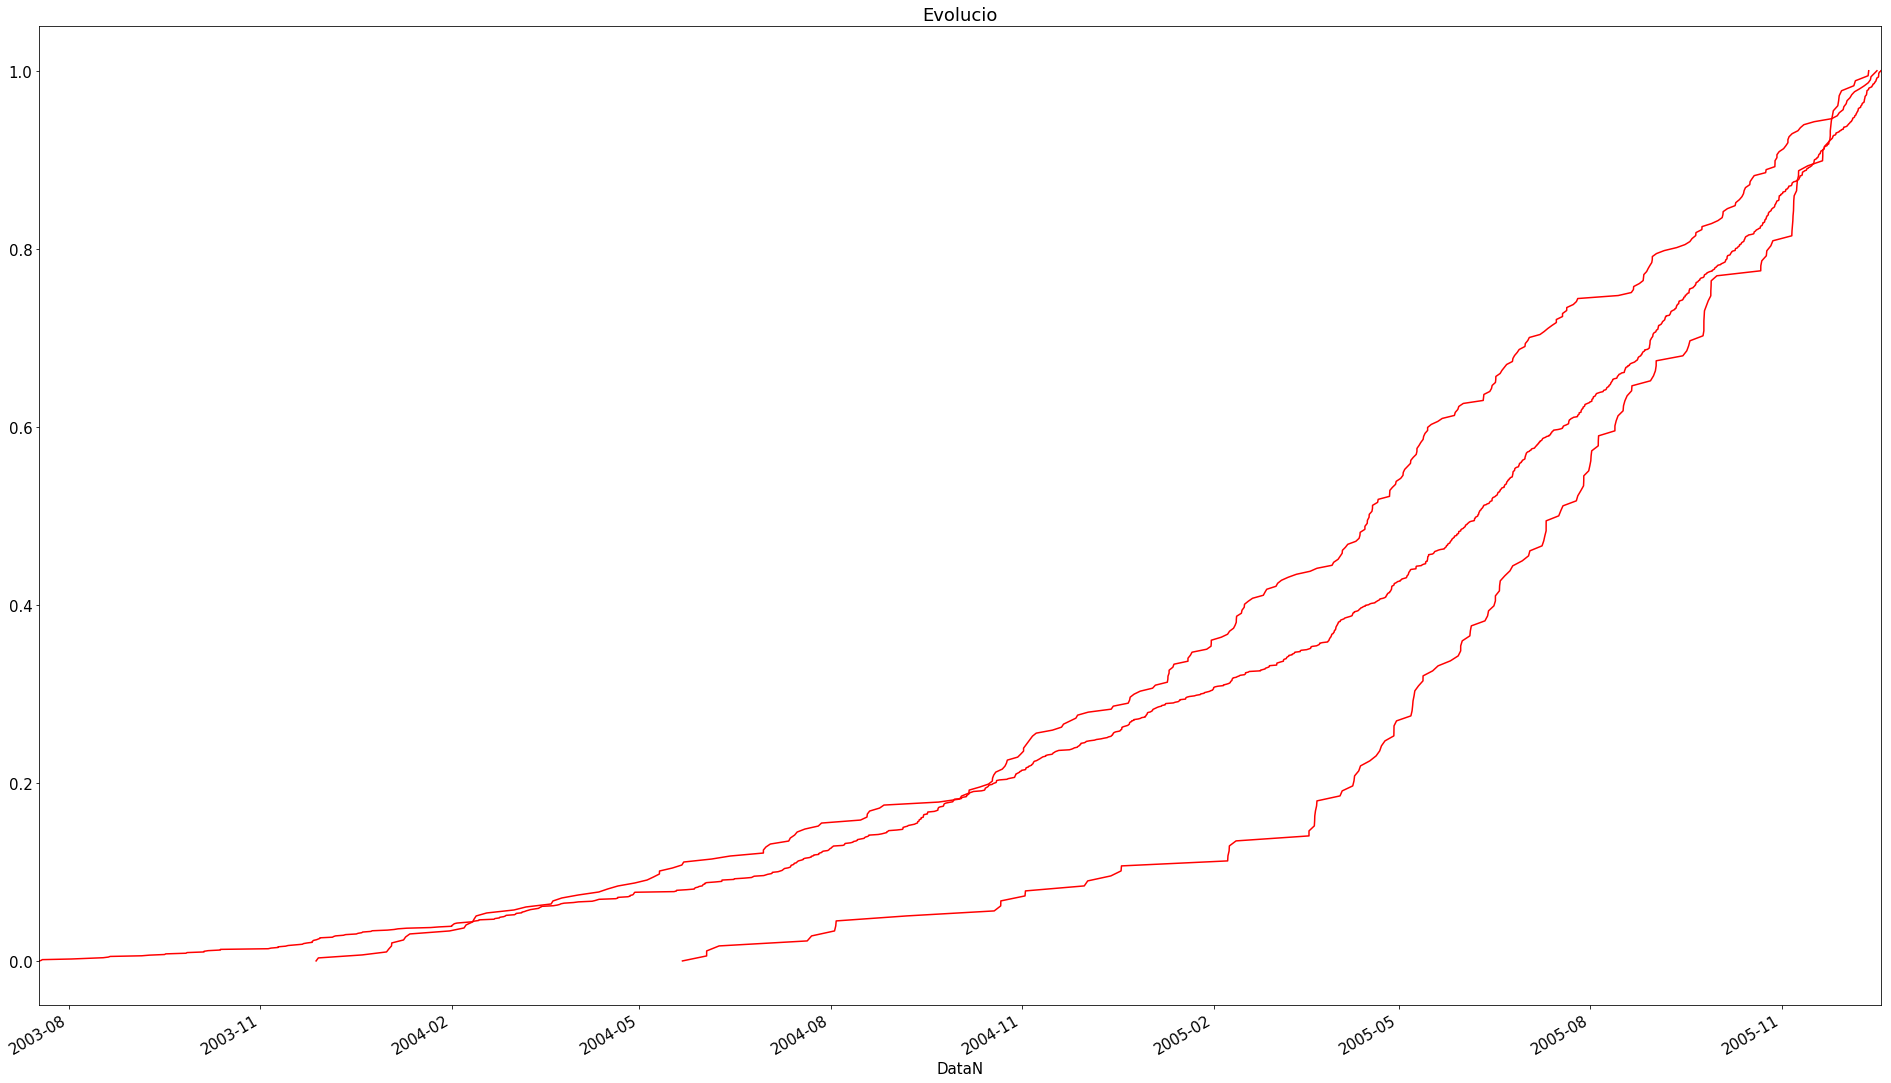

In [136]:
for a in llistat_articles_es:
#a = 'Art_2'

    nom_df =('Wes' + a) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + a) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + a)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ a) #nom de la timeserie que creem per cada article
    
    nom_df = Wes.loc[Wes['Article'] == (a)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df[Comptador] = nom_df[Comptador]/nom_df[Comptador].max() #normalitzem
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color ='r') #plotegem (pendent de refinar)
    #plt.show();


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


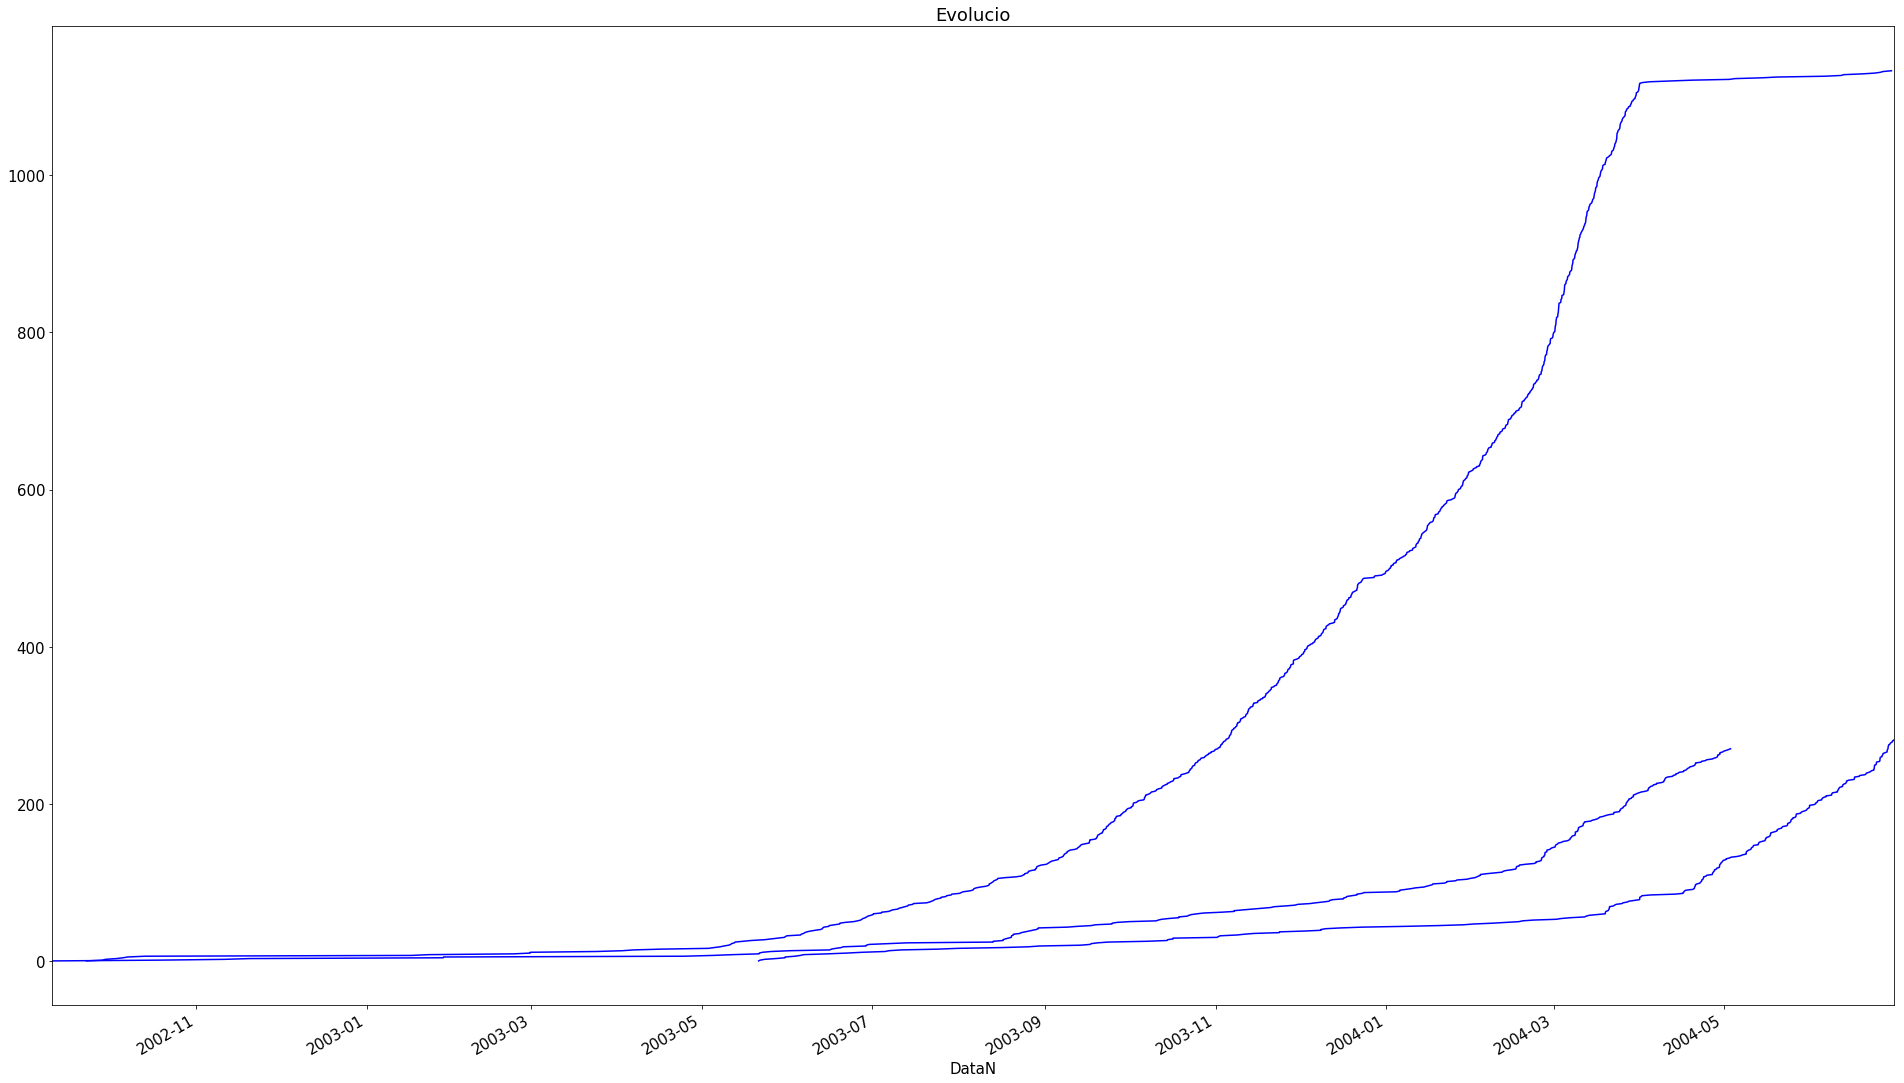

In [137]:
for b in llistat_articles_de:
#a = 'Art_2'

    nom_df =('Wde' + a) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + b) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + b)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ b) #nom de la timeserie que creem per cada article
    
    nom_df = Wde.loc[Wde['Article'] == (b)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color = 'b') #plotegem (pendent de refinar)
    #plt.show();



/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


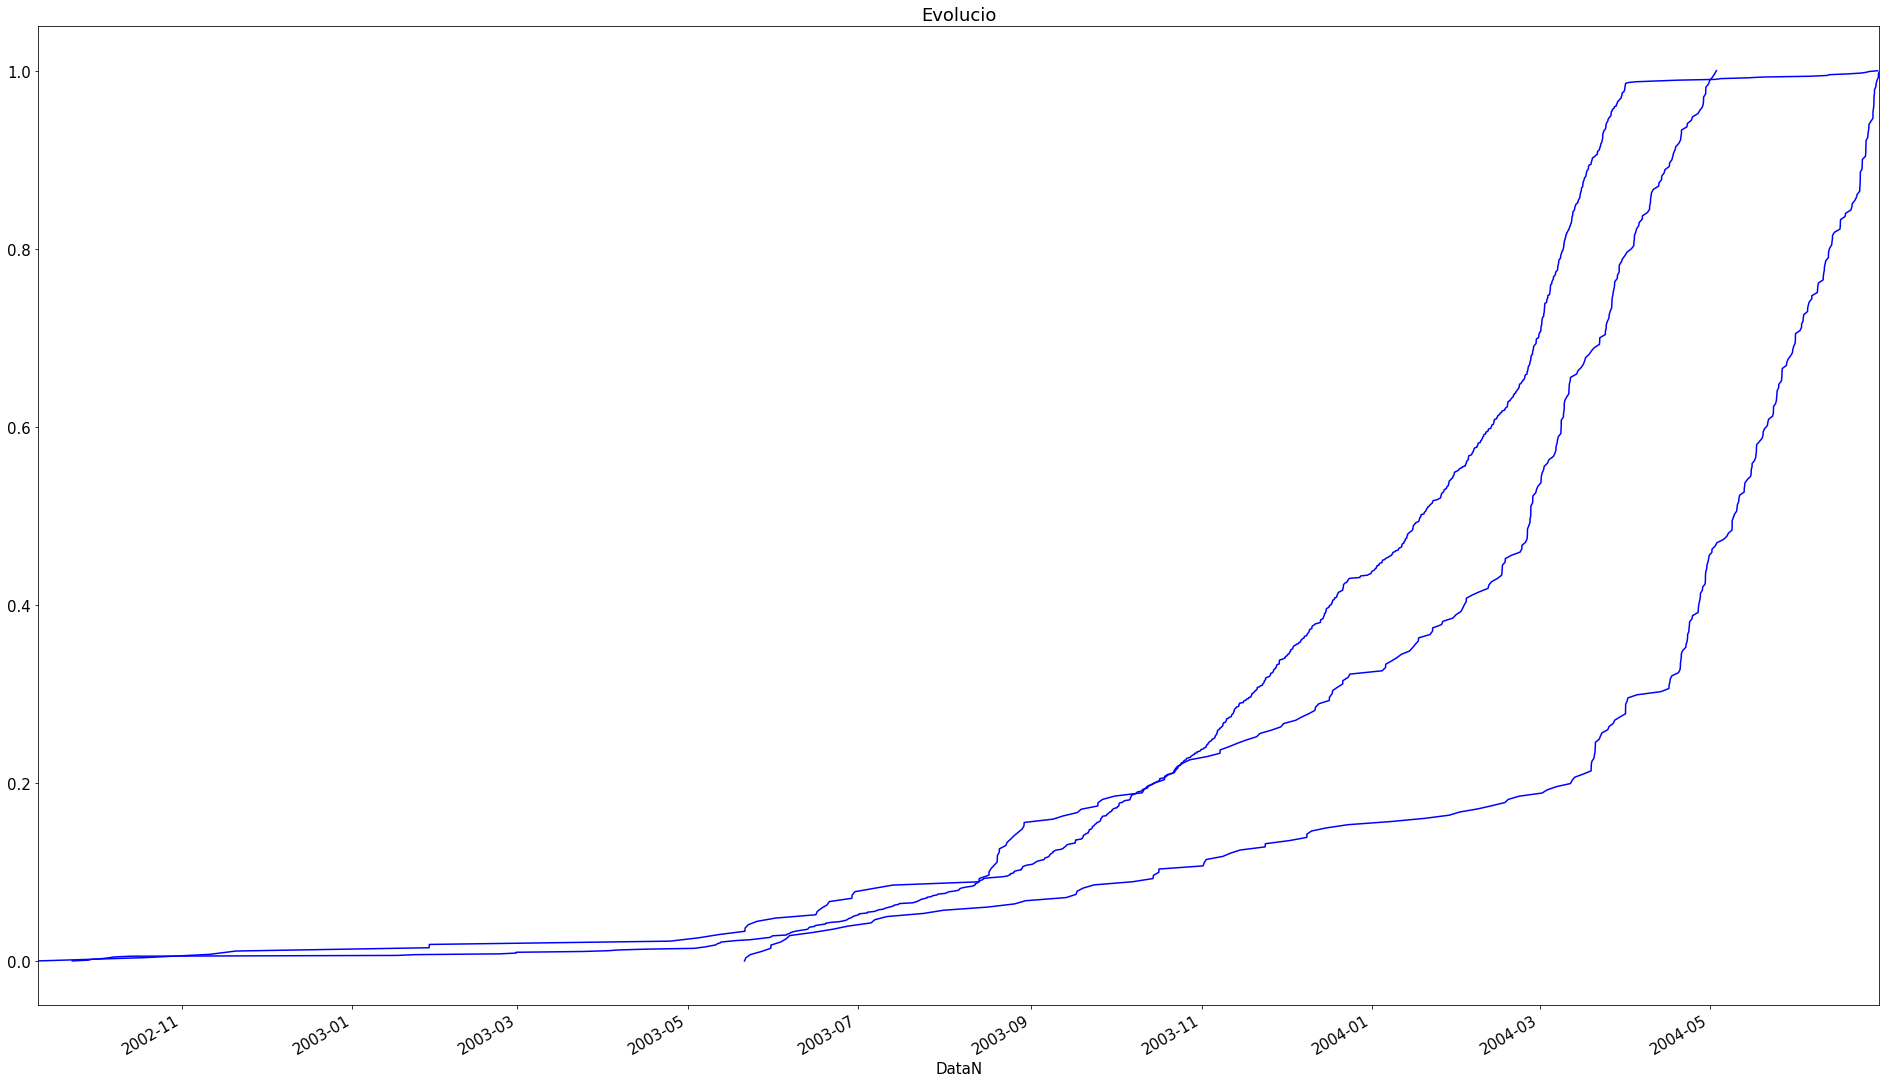

In [138]:
for b in llistat_articles_de:
#a = 'Art_2'

    nom_df =('Wde' + a) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + b) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + b)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ b) #nom de la timeserie que creem per cada article
    
    nom_df = Wde.loc[Wde['Article'] == (b)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df[Comptador] = nom_df[Comptador]/nom_df[Comptador].max() #normalitzem
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color = 'b') #plotegem (pendent de refinar)
    #plt.show();

In [140]:
print llistat_autors_de

for d in llistat_autors_de:
#a = 'Art_2'

    nom_df =('Wde' + d) #nom del dataframe que es crea per cada article
    Comptador = ('Comptador' + d) #string per crear la columna ['Comptador]
    comptador_range = ('Comptador' + d)  # string per anomenar el range que crea per cada article per comptar contribucions
    ts = ('ts'+ d) #nom de la timeserie que creem per cada article
    
    nom_df = Wde.loc[Wde['Autor'] == (d)] # dataframe filtrant per article
    comptador_range = pd.Series(range (len(nom_df))) #range per comptar les contribucions dins de cada article
    nom_df[Comptador] = comptador_range.values #columna que incorpora les contribucions.
    nom_df=nom_df.set_index(nom_df.DataN); #passem la DataN a indexar el dataframe creat per cada article
    ts = pd.Series(nom_df[Comptador].values, index = nom_df['DataN']) #creem el timeseries Data-Contribució
    ts.plot (x='DataN', y=Comptador, title= 'Evolucio', figsize=(33,20), label='a', color = 'b') #plotegem (pendent de refinar)
    #plt.show();

[6.0, 8.0, 2.0, 386.0, 461.0, 191.0]


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

## 6. Distribució articles

En aquest apartat volem veure com es distribueixen els articles. Utilitzem una mostra més petita per ser més il.lustratius.

In [154]:
WesC=pd.read_csv('dfR.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=20000)
WdeC=pd.read_csv('dfR_de.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=20000)
Wes=WesC.sample(5000)
Wde=WdeC.sample(5000)

Wes=Wes.sort_values(by='Data')
Wde=Wde.sort_values(by='Data')

Wes['DataN'] = pd.to_datetime(Wes['Data'],unit='s')
Wde['DataN']= pd.to_datetime(Wde['Data'], unit = 's')

Wes.sort_values(by='DataN');
Wde.sort_values(by='DataN');

# Modifiquem la columna Article afegint-hi Art_
Wes['Article']= 'Art_es_' + Wes['Article'].astype(str)
Wes.head();
Wde['Article']= 'Art_de_' + Wde['Article'].astype(str)
Wde.head();

# Eliminem la columna Data si ja tenim la columna DataN
del Wes['Data']
Wes.head();

In [155]:

article_autor_es = Wes[['Article','Autor']].groupby('Article').count().sort_values(by='Autor', ascending = False)
article_autor_de = Wde[['Article','Autor']].groupby('Article').count().sort_values(by='Autor', ascending = False)

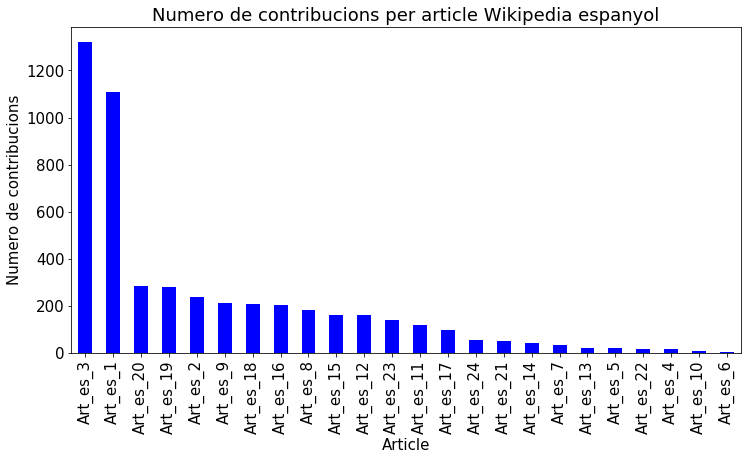

In [156]:
#plotegem en barres
ax = article_autor_es['Autor'].plot(kind='bar', color='b', alpha = 1, title='Numero de contribucions per article Wikipedia espanyol')
ax.set_ylabel("Numero de contribucions") #no admet Numero amb accent
plt.show()

<bound method AxesSubplot.set_ylabel of <matplotlib.axes._subplots.AxesSubplot object at 0x14b3f1dd0>>

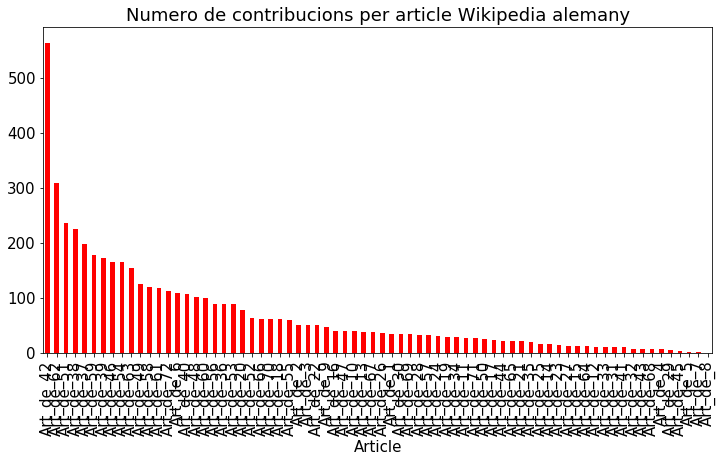

In [157]:
#plotegem en barres
ax = article_autor_de['Autor'].plot(kind='bar', color='r', title='Numero de contribucions per article Wikipedia alemany')
ax.set_ylabel

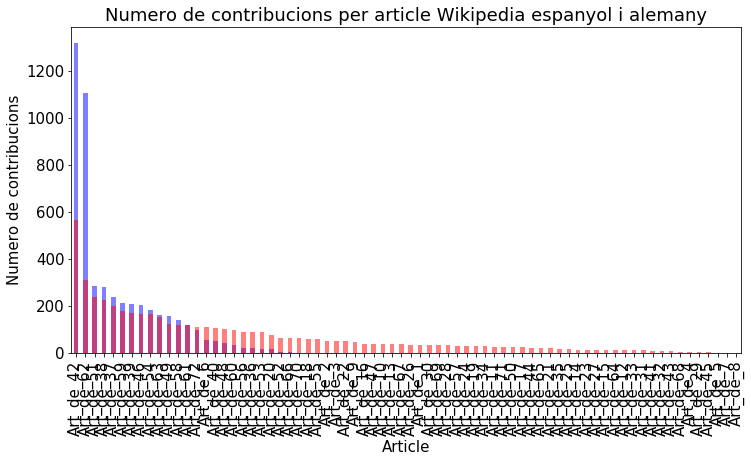

In [158]:
#plotegem en barres
ax = article_autor_es['Autor'].plot(kind='bar', color='b', alpha = 0.5, title='Numero de contribucions per article Wikipedia espanyol i alemany')
ax.set_ylabel("Numero de contribucions") #no admet Número amb accent


ax = article_autor_de['Autor'].plot(kind='bar', color='r', alpha = 0.5)
ax.set_ylabel("Numero de contribucions") #no admet Número amb accent

plt.show()

## Diferencies entre wikis:

L'idioma alemany és parlat per uns 90 milions de persones. La wiki alemanya té 3,620,990 usuaris 4,046,832 = 3,620,990 + 425,842 vertices (users + articles). D'una altra banda l'espanyol és un idioma de parla més extensa (472 milions el parla), però en canvi trobem que la seva wikipedia te 3,288,398 usuaris 3,623,742 = 3,288,398 + 335,344 vertices (users + articles), menys que el de l'idioma alemany. 

A continuació estudiarem el top 20 d'articles més editats, i quin són els mesos i dies de la setmana en que s'edita més. 

In [186]:
#WesC=pd.read_csv('WesC_clean.csv',na_values=':',usecols=["Article","Autor","Data"])
WesC=pd.read_csv('WesC_clean.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=100000)
WesC=WesC.sample(10000)
WesC['DataN'] = pd.to_datetime(WesC['Data'],unit='s')
WesC.index = WesC['DataN']
WesC.head()

,Autor,Article,Data,DataN
DataN,,,,
2004-04-24 17:46:44,11132.000,Art_5064.0,1082828804.000,2004-04-24 17:46:44
2004-03-25 20:41:12,35.000,Art_18640.0,1080247272.000,2004-03-25 20:41:12
2004-05-28 21:50:56,188.000,Art_27830.0,1085781056.000,2004-05-28 21:50:56
2004-04-06 09:27:22,16.000,Art_22846.0,1081243642.000,2004-04-06 09:27:22
2003-02-01 15:41:46,4.000,Art_1713.0,1044114106.000,2003-02-01 15:41:46


In [187]:
WesC_de=pd.read_csv('WesC_clean_de.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=100000)
WesC_de=WesC_de.sample(10000)
WesC_de['DataN'] = pd.to_datetime(WesC_de['Data'],unit='s')
WesC_de.index = WesC_de['DataN']
WesC_de.head()

,Autor,Article,Data,DataN
DataN,,,,
2003-05-07 19:02:35,8.000,Art_5039.0,1052334155.000,2003-05-07 19:02:35
2003-06-03 22:42:46,10008.000,Art_2324131.0,1054680166.000,2003-06-03 22:42:46
2002-10-04 14:50:45,186.000,Art_7569.0,1033743045.000,2002-10-04 14:50:45
2003-05-23 06:04:14,1577.000,Art_15456.0,1053669854.000,2003-05-23 06:04:14
2002-08-28 21:36:41,1.000,Art_2963258.0,1030570601.000,2002-08-28 21:36:41


In [188]:
import datetime
WesC['DataNyear'] = WesC['DataN'].dt.year
WesC['DataNmonth'] = WesC['DataN'].dt.month
WesC['DataNday'] = WesC['DataN'].dt.weekday_name

WesC.head()

WesC_de['DataNyear'] = WesC_de['DataN'].dt.year
WesC_de['DataNmonth'] = WesC_de['DataN'].dt.month
WesC_de['DataNday'] = WesC_de['DataN'].dt.weekday_name

WesC_de.head()

,Autor,Article,Data,DataN,DataNyear,DataNmonth,DataNday
DataN,,,,,,,
2003-05-07 19:02:35,8.000,Art_5039.0,1052334155.000,2003-05-07 19:02:35,2003,5,Wednesday
2003-06-03 22:42:46,10008.000,Art_2324131.0,1054680166.000,2003-06-03 22:42:46,2003,6,Tuesday
2002-10-04 14:50:45,186.000,Art_7569.0,1033743045.000,2002-10-04 14:50:45,2002,10,Friday
2003-05-23 06:04:14,1577.000,Art_15456.0,1053669854.000,2003-05-23 06:04:14,2003,5,Friday
2002-08-28 21:36:41,1.000,Art_2963258.0,1030570601.000,2002-08-28 21:36:41,2002,8,Wednesday


In [189]:
#Creem una taula pivot amb el nombre d'edicions de cada article per any
WesC2 = WesC[['Autor','Article','DataNyear']]
pivedu=pd.pivot_table(WesC2, index='Article',columns='DataNyear', aggfunc=len, fill_value=0)
pivedu_all=pd.pivot_table(WesC2, index='Article',columns='DataNyear', aggfunc=len, fill_value=0, margins=True)
print pivedu
print len(pivedu)

WesC2_de = WesC_de[['Autor','Article','DataNyear']]
pivedu_de=pd.pivot_table(WesC2_de, index='Article',columns='DataNyear', aggfunc=len, fill_value=0)
pivedu_all_de=pd.pivot_table(WesC2_de, index='Article',columns='DataNyear', aggfunc=len, fill_value=0, margins=True)
print pivedu_de
print len(pivedu_de)



             Autor          
DataNyear     2002 2003 2004
Article                     
Art_1.0          0    0   25
Art_10002.0      0    1    0
Art_10004.0      0    1    0
Art_10006.0      0    1    0
Art_10011.0      0    1    0
Art_10015.0      0    1    0
Art_10016.0      0    0    1
Art_10024.0      0    1    0
Art_10027.0      0    0    1
Art_10028.0      0    1    0
Art_10031.0      0    1    0
Art_10033.0      0    1    0
Art_1004.0       0    0    1
Art_10040.0      0    0    1
Art_10044.0      0    1    0
Art_100455.0     0    0    1
Art_10048.0      0    1    0
Art_1005.0       0    1    2
Art_10050.0      0    0    3
Art_10056.0      0    1    0
Art_10059.0      0    1    0
Art_1006.0       0    2    0
Art_10062.0      0    0    1
Art_10071.0      0    1    0
Art_100737.0     0    0    1
Art_10075.0      0    0    1
Art_10078.0      0    0    2
Art_10079.0      0    1    0
Art_10085.0      0    1    0
Art_10086.0      0    1    0
...            ...  ...  ...
Art_992647.0  

In [190]:
pivedu.rank(ascending=False,method='first')
pivedu_de.rank(ascending=False,method='first')

Autor                  
DataNyear        2001     2002     2003
Article                                
Art_100.0       3.000  299.000 5734.000
Art_10004.0     4.000 2072.000 1081.000
Art_1001.0      5.000  300.000 5735.000
Art_10010.0     6.000 2073.000 1082.000
Art_10013.0     7.000 2074.000 1083.000
Art_10014.0     8.000  301.000 1084.000
Art_10015.0     9.000 2075.000 1085.000
Art_10016.0    10.000  302.000 5736.000
Art_10017.0    11.000   53.000 5737.000
Art_10022.0    12.000  303.000 5738.000
Art_10028.0    13.000 2076.000 1086.000
Art_10036.0    14.000 2077.000 1087.000
Art_10037.0    15.000 2078.000 1088.000
Art_10043.0    16.000 2079.000 1089.000
Art_10044.0    17.000  304.000 5739.000
Art_10048.0    18.000 2080.000 1090.000
Art_10049.0    19.000 2081.000  288.000
Art_10054.0    20.000 2082.000 1091.000
Art_1006.0     21.000 2083.000  289.000
Art_10064.0    22.000  305.000 5740.000
Art_10068.0    23.000   54.000 5741.000
Art_10076.0    24.000  306.000 5742.000
Art_10079.0    25.000 2084.000 1092.000
Art_10080.0    26.000  307.000 5743.000
Art_10084.0    27.000 2085.000 1093.000
Art_10089.0    28.000 2086.000 1094.000
Art_10090.0    29.000  308.000 1095.000
Art_10095.0    30.000 2087.000  103.000
Art_10098.0    31.000  309.000 5744.000
Art_10100.0    32.000  310.000 5745.000
...               ...      ...      ...
Art_9899.0   7225.000 7240.000  286.000
Art_99.0     7226.000 7241.000 5721.000
Art_9902.0   7227.000 2058.000 7244.000
Art_9910.0   7228.000 7242.000 5722.000
Art_9926.0   7229.000 2059.000 7245.000
Art_9927.0   7230.000 2060.000 5723.000
Art_993.0    7231.000  298.000 7246.000
Art_9930.0   7232.000 7243.000 5724.000
Art_9931.0   7233.000 7244.000 5725.000
Art_9933.0   7234.000 7245.000 5726.000
Art_9936.0   7235.000 2061.000 7247.000
Art_9940.0   7236.000 2062.000 1078.000
Art_9941.0   7237.000 2063.000 7248.000
Art_9942.0   7238.000 2064.000 1079.000
Art_9943.0   7239.000 2065.000 7249.000
Art_9944.0   7240.000 7246.000 5727.000
Art_9946.0   7241.000 7247.000   21.000
Art_9951.0   7242.000 2066.000 7250.000
Art_9952.0   7243.000 7248.000 5728.000
Art_9955.0   7244.000 2067.000 7251.000
Art_9961.0   7245.000 7249.000 5729.000
Art_9968.0   7246.000 2068.000 7252.000
Art_997.0    7247.000 7250.000 5730.000
Art_9979.0   7248.000 7251.000 5731.000
Art_998.0    7249.000 2069.000 7253.000
Art_9980.0   7250.000 7252.000 5732.000
Art_9981.0   7251.000 2070.000 7254.000
Art_9986.0   7252.000 7253.000 5733.000
Art_998979.0 7253.000 7254.000 1080.000
Art_998987.0 7254.000 2071.000  287.000

[7254 rows x 3 columns]

Article
Art_5064.0       184
Art_2957.0        57
Art_6150.0        34
Art_4818.0        33
Art_79979.0       30
Art_1.0           25
Art_1479198.0     23
Art_3989.0        20
Art_2529.0        19
Art_5485.0        18
Art_18640.0       17
Art_7858.0        15
Art_6095.0        15
Art_3726.0        14
Art_10922.0       13
Art_20834.0       13
Art_5945.0        12
Art_684.0         12
Art_11383.0       11
Art_5422.0        11
dtype: int64


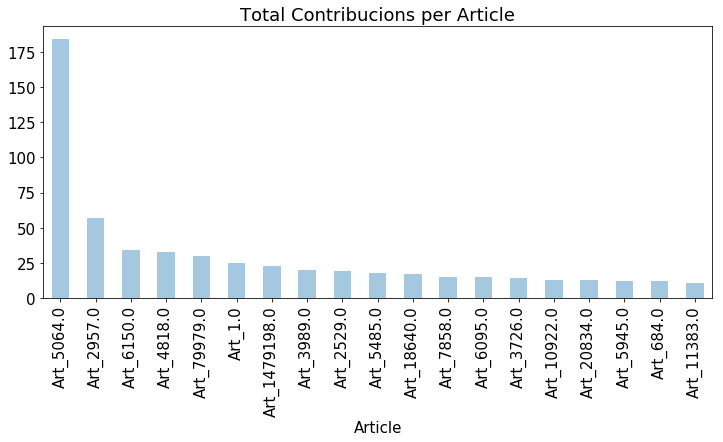

In [191]:
totalSum = pivedu.sum(axis=1)
print totalSum.sort_values(ascending=False).head(20)

totalSum_sorted=totalSum.sort_values(ascending=False)
totalSum_top20=totalSum_sorted[0:19]

fig = plt.figure(figsize=(12,5))
totalSum_top20.plot(kind='bar',style='b', alpha=0.4,title = "Total Contribucions per Article")
#plt.savefig("Top10_contribucions.png",dpi= 300, bbox_inches='tight')
plt.show()


Article
Art_6452.0       65
Art_266.0        51
Art_2552.0       43
Art_5613.0       37
Art_691825.0     32
Art_5587.0       31
Art_22703.0      25
Art_5914.0       18
Art_10960.0      15
Art_2963258.0    13
Art_1438080.0    12
Art_3833.0       11
Art_1653.0       11
Art_718.0        10
Art_23277.0      10
Art_3939.0        9
Art_1280.0        9
Art_14808.0       9
Art_21527.0       9
Art_1372656.0     8
dtype: int64


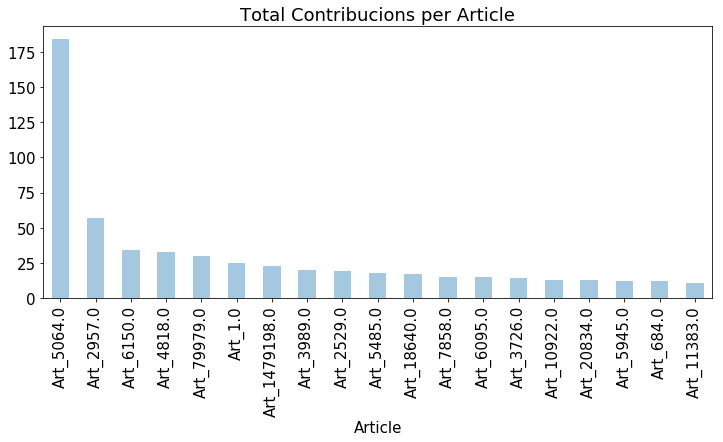

In [192]:
totalSum_de = pivedu_de.sum(axis=1)
print totalSum_de.sort_values(ascending=False).head(20)

totalSum_de_sorted=totalSum_de.sort_values(ascending=False)
totalSum_de_top20=totalSum_sorted[0:19]

fig = plt.figure(figsize=(12,5))
totalSum_de_top20.plot(kind='bar',style='b', alpha=0.4,title = "Total Contribucions per Article")
#plt.savefig("Top10_contribucions.png",dpi= 300, bbox_inches='tight')
plt.show()


In [193]:
kk=pivedu_all.sort_values(by=('Autor', 'All' ), ascending=False, inplace=False)
print kk[1:20]
kk2 = kk.iloc[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], [1,2,3]]

kk_de=pivedu_all_de.sort_values(by=('Autor', 'All' ), ascending=False, inplace=False)
print kk_de[1:20]
kk2_de = kk_de.iloc[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], [1,2,3]]

# these last three numbers [1,2,3] need to be adapted to the number of years that appear 
#in our data, so it depends on how much data we are consdering.



              Autor                       
DataNyear      2002   2003    2004     All
Article                                   
Art_5064.0    0.000 63.000 121.000 184.000
Art_2957.0    0.000 23.000  34.000  57.000
Art_6150.0    0.000 11.000  23.000  34.000
Art_4818.0    0.000 15.000  18.000  33.000
Art_79979.0   0.000  6.000  24.000  30.000
Art_1.0       0.000  0.000  25.000  25.000
Art_1479198.0 1.000 16.000   6.000  23.000
Art_3989.0    0.000  4.000  16.000  20.000
Art_2529.0    1.000  4.000  14.000  19.000
Art_5485.0    0.000  9.000   9.000  18.000
Art_18640.0   0.000  0.000  17.000  17.000
Art_6095.0    0.000  8.000   7.000  15.000
Art_7858.0    0.000  4.000  11.000  15.000
Art_3726.0    0.000  8.000   6.000  14.000
Art_10922.0   0.000  1.000  12.000  13.000
Art_20834.0   0.000  0.000  13.000  13.000
Art_5945.0    0.000  6.000   6.000  12.000
Art_684.0     0.000  5.000   7.000  12.000
Art_2954.0    0.000  5.000   6.000  11.000
              Autor                     
DataNyear    

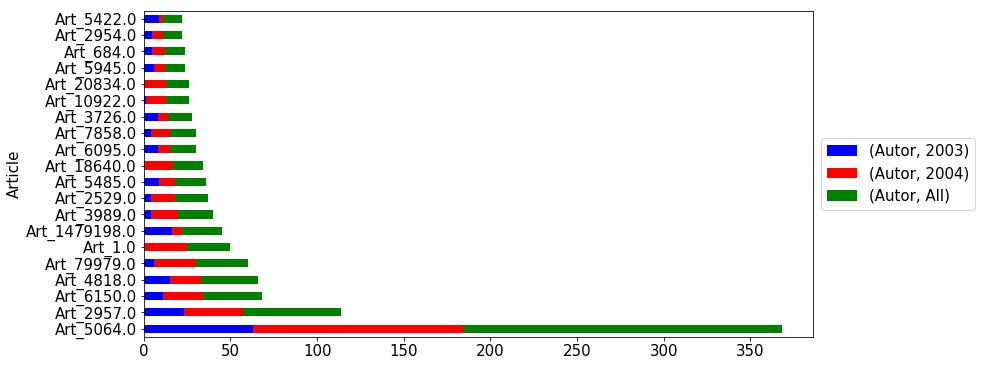

In [194]:
my_colors = ['b', 'r', 'g', 'y', 'm','c'] 
ax = kk2.plot(kind='barh',stacked=True, color=my_colors,figsize=(12, 6))
#ax = pivedu[200:219].plot(kind='barh',stacked=True, color=my_colors,figsize=(12, 6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#plt.savefig("Value_Time_Country.png",dpi= 300, bbox_inches='tight')
plt.show()

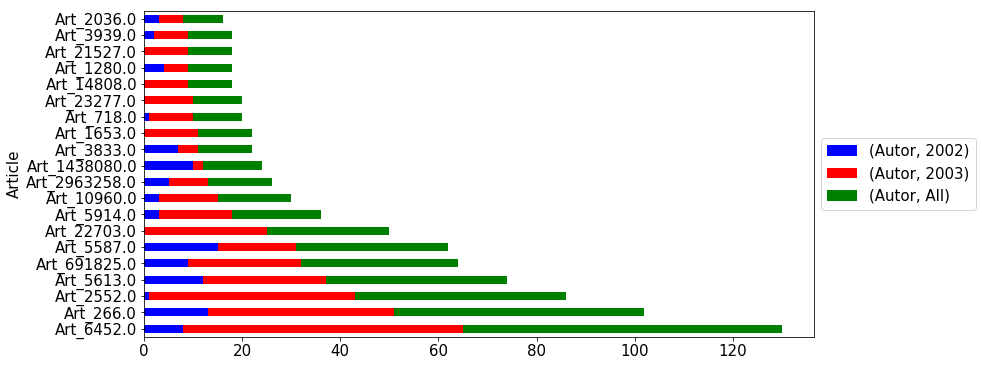

In [195]:
my_colors = ['b', 'r', 'g', 'y', 'm','c'] 
ax = kk2_de.plot(kind='barh',stacked=True, color=my_colors,figsize=(12, 6))
#ax = pivedu[200:219].plot(kind='barh',stacked=True, color=my_colors,figsize=(12, 6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#plt.savefig("Value_Time_Country.png",dpi= 300, bbox_inches='tight')
plt.show()

# Wiki castellana

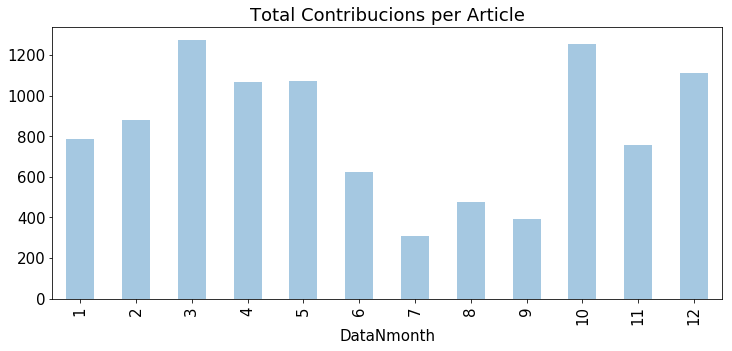

In [196]:
#Creem una taula pivot amb el nombre d'edicions de cada article per mes
WesC2 = WesC[['Autor','Article','DataNmonth']]
pivedu_mes=pd.pivot_table(WesC2, index='DataNmonth',columns='Article', aggfunc=len, fill_value=0)
#print pivedu_mes

pivedu_mes.rank(ascending=False,method='first')
totalSum = pivedu_mes.sum(axis=1)
totalSum.rank(ascending=False,method='dense').sort_values().head(10)

fig = plt.figure(figsize=(12,5))
totalSum=pivedu_mes.sum(axis=1)
#totalSum=pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar',style='b', alpha=0.4,title = "Total Contribucions per Article")
plt.savefig("Total_contribucions_mes.png",dpi= 300, bbox_inches='tight')
plt.show()

{'Monday': 0, 'Tuesday': 1, 'Friday': 4, 'Wednesday': 2, 'Thursday': 3, 'Sunday': 6, 'Saturday': 5}
Day_id
0     7938
1     8298
2     8088
3     7416
4    10542
5     8538
6     9180
dtype: int64


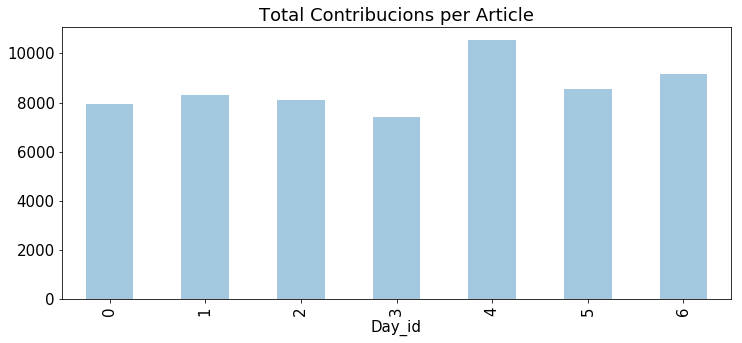

In [197]:
#Creem una taula pivot amb el nombre d'edicions de cada article per dia

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
print sorterIndex
WesC.index = WesC['DataNday']
WesC['Day_id'] = WesC['DataNday']
WesC['Day_id'] = WesC['Day_id'].map(sorterIndex)
WesC.sort_values('Day_id', inplace=True)
WesC.index = WesC['Day_id']
WesC.head()

#WesC2 = WesC[['Autor','Article','DataNday']]
pivedu_dia=pd.pivot_table(WesC, index='Day_id',columns='Article', aggfunc=len, fill_value=0)
#print pivedu
#pivedu.rank(ascending=False,method='first')
totalSum = pivedu_dia.sum(axis=1)
#print pivedu_dia

pivedu_dia=pd.pivot_table(WesC, index='Day_id',columns='Article', aggfunc=len, fill_value=0)

fig = plt.figure(figsize=(12,5))
totalSum=pivedu_dia.sum(axis=1)
print totalSum
#totalSum=pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar',style='b', alpha=0.4,title = "Total Contribucions per Article")
#plt.savefig("Total_contribucions.png",dpi= 300, bbox_inches='tight')
plt.show()

# Wiki alemana

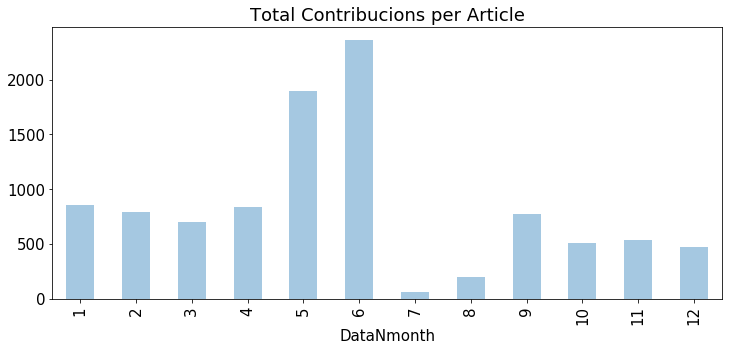

In [198]:
#Creem una taula pivot amb el nombre d'edicions de cada article per mes
WesC2_de = WesC_de[['Autor','Article','DataNmonth']]
pivedu_mes=pd.pivot_table(WesC2_de, index='DataNmonth',columns='Article', aggfunc=len, fill_value=0)
#print pivedu_mes

pivedu_mes.rank(ascending=False,method='first')
totalSum = pivedu_mes.sum(axis=1)
totalSum.rank(ascending=False,method='dense').sort_values().head(10)

fig = plt.figure(figsize=(12,5))
totalSum=pivedu_mes.sum(axis=1)
#totalSum=pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar',style='b', alpha=0.4,title = "Total Contribucions per Article")
plt.savefig("Total_contribucions_mes.png",dpi= 300, bbox_inches='tight')
plt.show()

{'Monday': 0, 'Tuesday': 1, 'Friday': 4, 'Wednesday': 2, 'Thursday': 3, 'Sunday': 6, 'Saturday': 5}
Day_id
0    9288
1    8688
2    8166
3    8544
4    8580
5    7722
6    9012
dtype: int64


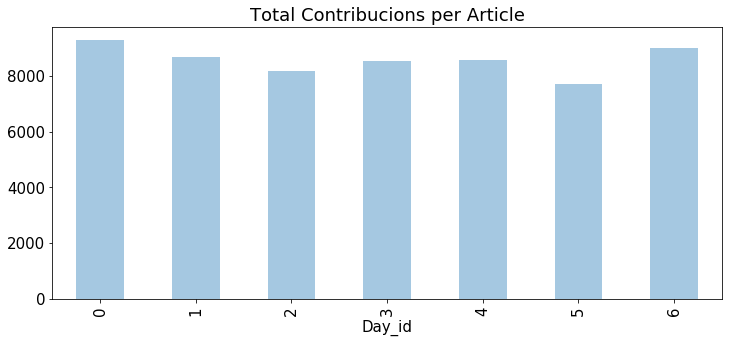

In [199]:
#Creem una taula pivot amb el nombre d'edicions de cada article per dia

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
print sorterIndex

WesC=WesC_de

WesC.index = WesC['DataNday']
WesC['Day_id'] = WesC['DataNday']
WesC['Day_id'] = WesC['Day_id'].map(sorterIndex)
WesC.sort_values('Day_id', inplace=True)
WesC.index = WesC['Day_id']
WesC.head()

#WesC2 = WesC[['Autor','Article','DataNday']]
pivedu_dia=pd.pivot_table(WesC, index='Day_id',columns='Article', aggfunc=len, fill_value=0)
#print pivedu
#pivedu.rank(ascending=False,method='first')
totalSum = pivedu_dia.sum(axis=1)
#print pivedu_dia

pivedu_dia=pd.pivot_table(WesC, index='Day_id',columns='Article', aggfunc=len, fill_value=0)

fig = plt.figure(figsize=(12,5))
totalSum=pivedu_dia.sum(axis=1)
print totalSum
#totalSum=pivedu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind='bar',style='b', alpha=0.4,title = "Total Contribucions per Article")
#plt.savefig("Total_contribucions.png",dpi= 300, bbox_inches='tight')
plt.show()

## Conclusions

Hem executat el codi (fora del notebook perque aquí va molt lent) en una mostra random d'1 milio de línies per wiki i hem vist que els dies en que la wiki castellana s'edita més són els dilluns i dimecres, mentre que els alemanys editen més en diumenge. En quant als mesos, la wiki castellana és més editada al més de Març i Maig, mentre que els alemanys aprofiten a fer-ho a l'Agost. En ambdós casos trobem una baixada considerable de les edicions de la wikipedia a partir del més de Setembre.  